In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import defaultdict
import numpy as np
import statsmodels.api as sm
import folium
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)

<br><br><h1 style='font-family:Trebuchet MS; color:#34495E'> 311 Complaints Analysis (HPD) </h1><center>

<table style='font-family:Trebuchet MS'>
<col width = '550'>
<col width = '450'>
<tr>
<td><img src="https://www1.nyc.gov/assets/hpd/images/content/pages/what-to-expect-sm.png" /></td>
<td>
The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in New York are assigned these problems. The <b>Department of Housing Preservation and Development</b> of New York City is the agency that processes 311 complaints that are related to housing and buildings.<br>
<br>    
In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

</td>
</tr>
</table>

<h1 style='font-family:Trebuchet MS; color:#34495E'> Problem Statement <a id='2'></a></h1>
<p style='font-family:Trebuchet MS'>The agency needs answers to several questions. The answers to those questions must be supported by data and analytics. These are their questions:<ol><p style='font-family:Trebuchet MS'>
1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?<br><br>
2. Should the Department of Housing Preservation and Development of New York City focus on any particular set of boroughs, ZIP codes, or street (where the complaints are severe) for the specific type of complaints you identified in response to Question 1?<br><br>
3. Does the Complaint Type that you identified in response to question 1 have an obvious relationship with any particular characteristic or characteristics of the houses or buildings?<br><br>
4. Can a predictive model be built for a future prediction of the number of complaints of the type that you have identified in response to question 1?

<h1 style='font-family:Trebuchet MS; color:#34495E'> About Dataset 1<a id='1'></a></h1>
<p style='font-family:Trebuchet MS'>This dataset will have complaints submitted between 2010 and 2020. It can be downloaded from <a href = 'https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status'> here </a>.
<table style='font-family:Trebuchet MS'>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
      <td><code>created_date</code></td>
    <td>Date SR was created. </td>
  </tr>
  <tr>
    <td><code>unique_key</code></td>
    <td>Unique identifier of a Service Request (SR) in the open data set. </td>
  </tr>  
  <tr>
    <td><code>complaint_type</code></td>
    <td>This is the first level of a hierarchy identifying the topic of the incident or condition. Complaint Type may have a corresponding Descriptor (below) or may stand alone.</td>
  </tr>  
  <tr>
    <td><code>incident_zip</code></td>
    <td>Incident location zip code, provided by geo validation.</td>
  </tr> 
    <tr>
    <td><code>incident_address</code></td>
    <td>House number of incident address provided by submitter.</td>
  </tr> 
    <tr>
    <td><code>street_name</code></td>
    <td>Street name of incident address provided by the submitter.</td>
  </tr>  
    <tr>
    <td><code>address_type</code></td>
    <td>Type of incident location information available.</td>
  </tr> 
    <tr>
    <td><code>city</code></td>
    <td>City of the incident location provided by geovalidation. </td>
  </tr>
    <tr>
    <td><code>resolution_description</code></td>
    <td>Describes the last action taken on the SR by the responding agency. May describe next or future steps. </td>
  </tr>    
    <tr>
    <td><code>borough</code></td>
    <td>Provided by the submitter and confirmed by geovalidation.</td>
  </tr>    
    <tr>
    <td><code>latitude</code></td>
    <td>Geo based Lat of the incident location.</td>
  </tr>   
    <tr>
    <td><code>longitude</code></td>
    <td>Geo based Long of the incident location.</td>
  </tr>       
    <tr>
    <td><code>closed_date</code></td>
    <td>Date SR was closed by responding agency. </td>
  </tr>           
    <tr>
    <td><code>location_type</code></td>
    <td>Describes the type of location used in the address information. </td>
  </tr> 
    <tr>
    <td><code>status</code></td>
    <td>Status of SR submitted. </td>
  </tr> 
    
    
    
    
</table>

<p style='font-family:Trebuchet MS'> From Above Dataset 1 section, it is easy to see that the types of features can be categorised into: <ol><p style='font-family:Trebuchet MS'>
1. Geospatial Features: The columns that provides locational informations: <code>incident_zip, incident_addres, street_name, borough, latitude, longitude </code>. In fact, they might all referring to one thing-- the affected building.<br>
2. Numerical Features: <code>unique_key</code>; however, visualise it may not provide any additional information to us as it serves like an 'ID'.<br> 
3. Categorical Features: <code>complaint_type, resolution_description, status, address_type, location_type</code>.<br>
4. Time series: <code>created_date, closed_date</code>.

<p style='font-family: Trebuchet MS; color:#34495E'> Import Dataset

In [2]:
df = pd.read_csv('fhrw-4uyv (3).csv')

<p style='font-family: Trebuchet MS; color:#34495E'> Parse Date

In [3]:
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])

<h1 style='font-family:Trebuchet MS; color:#34495E'> Table of Contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px; font-family:Trebuchet MS; color:#34495E">

1.  [Problem Statement](#2)<br>
2.  [About Dataset 1](#1)<br>
3.  [Preliminary Analysis](#3) <br>
4.  [Exploring Complaint Types](#4) <br>
5.  [Other Categorical Variables](#5) <br>
6.  [Time Series Analysis](#6) <br>
7.  [Geospatial Data](#7) <br>
8.  [About Dataset 2](#8)<br>
9.  [Preliminary Analysis 2](#9)<br>
10.  [Categorical Variables](#10)<br>
11.  [Numerical Variables](#11)<br>

    </div>

<h1 style='font-family: Trebuchet MS; color:#34459E'> Preliminary Analysis <a id='3'></a></h1>

In [4]:
df.shape

(6528551, 15)

<p style='font-family:Trebuchet MS; color:#34459E'> Exploring Data Type & Null & Unique Value Distribution </p>

In [5]:
def NullUnique(df):
    dic = defaultdict(list)
    for i in df.columns:
        dic['Feature'].append(i)
        dic['UniqueValue'].append(len(df[i].unique()))
        dic['NullValue'].append(df[i].isnull().sum())
        dic['%Null'].append(round(df[i].isnull().mean()*100, 2))
        dic['Data Type'].append(df[i].dtypes)
    return pd.DataFrame(dict(dic)).sort_values(['%Null'], ascending=False).style.background_gradient()

In [6]:
NullUnique(df)

,Feature,UniqueValue,NullValue,%Null,Data Type
12,closed_date,931741,144993,2.220000,datetime64[ns]
6,address_type,2,84752,1.300000,object
3,incident_zip,208,80820,1.240000,float64
10,latitude,190011,80794,1.240000,float64
11,longitude,190011,80794,1.240000,float64
7,city,90,80392,1.230000,object
4,incident_address,192227,52831,0.810000,object
5,street_name,6958,52831,0.810000,object
13,location_type,6,52830,0.810000,object
8,resolution_description,341,7821,0.120000,object


<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <br>

<p style='font-family:Trebuchet MS'>Unique Values: <br>
    1. Every data points has its own <code> unique_key</code>.<br>
    2. <code> resolution_description</code> has 341 unique values which seems to be not unusual.<br><br>
Null Values:<br>
    1. All of the columns have less than 5% Null Values.<br>
    2. The columns with maximum Null Values is <code> closed_date</code>(2.2%), followed by <code> address_type</code>(1.3%), <code> incident_zip</code>(1.24%), <code> latitude</code>(1.24%) and <code> longitude</code>(1.24%), <code> city</code>(1.23%). <br>
3. <code> created_date</code>, <code> unique_key</code>, <code> complaint_type</code>, <code> borough</code>, <code> status</code> have no null value; which is good news because <code> complaint_type</code> would be the main concern in this analysis.<br><br>
Data Types:<br>    
1. Only dtype of <code>incident_zip</code> is required to change for further analysis. Other than that, dtypes of all other columns are as expected.

`resolution_description`

In [7]:
df['resolution_description'].unique()[12:15]

array(['The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.',
       'More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development contacted a tenant in the building and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, p',
       'More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please f'],
      dtype=object)

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): 
<p style='font-family:Trebuchet MS'>From above, it should be easy to see the reason behind <code>resolution_description</code> has 341 unique values is because in the some columns, same resolution_description was recorded differently, eg. see above: same description but the sentence stopped at different word/alphabet(?). However, in the current analysis, it is not of concern. Thus, it will be excluded in further analysis. 

<h1 style='font-family: Trebuchet MS; color:#34459E'> Exploring Complaint Type <a id='4'></a></h1>

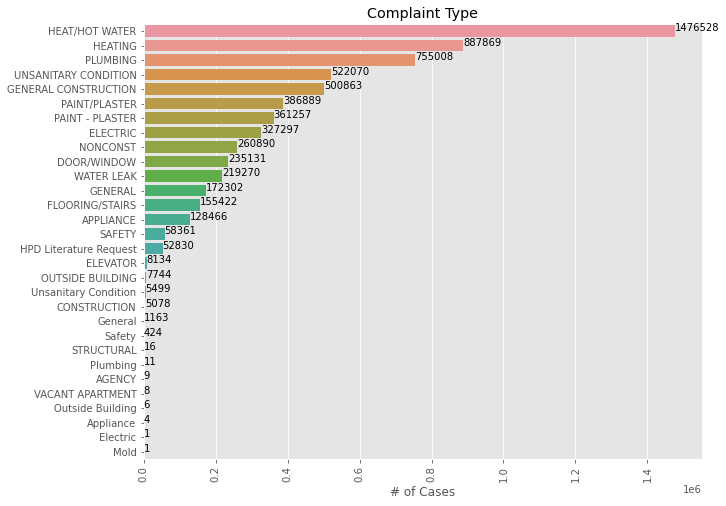

In [8]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y=df['complaint_type'].value_counts().index,
            x=df['complaint_type'].value_counts().values, 
            data=df)
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y()+rect.get_height()/2, '%d'%rect.get_width())
plt.xticks(rotation=90)
plt.xlabel('# of Cases')
plt.title('Complaint Type')
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <ol><p style='font-family:Trebuchet MS'>
1. Top complaint_type is HEAT/HOT WATER(1476528), followed by HEATING (887869), PLUMBING (755008), UNSANITARY CONDITION(522070) and GENERAL CONSTRUCTION(500863). Seems like we have answer to our Question 1 in Problem Statement. <br>
2. HEAT/HOT WATER is almost double of HEATING and both of them indicating the same problem - HEATING & HOT WATER issue.

In [9]:
top_5 = [x for x in df['complaint_type'].value_counts().index[:5]]

<p style='font-family:Trebuchet MS'> General Trend of Top 5 <code>complaint_type</code> over the years. 

In [10]:
x = pd.get_dummies(df['complaint_type'])
x = x[top_5]
ts = pd.concat([df['created_date'],x], axis=1)
ts= ts.set_index(['created_date']).resample('MS').sum()

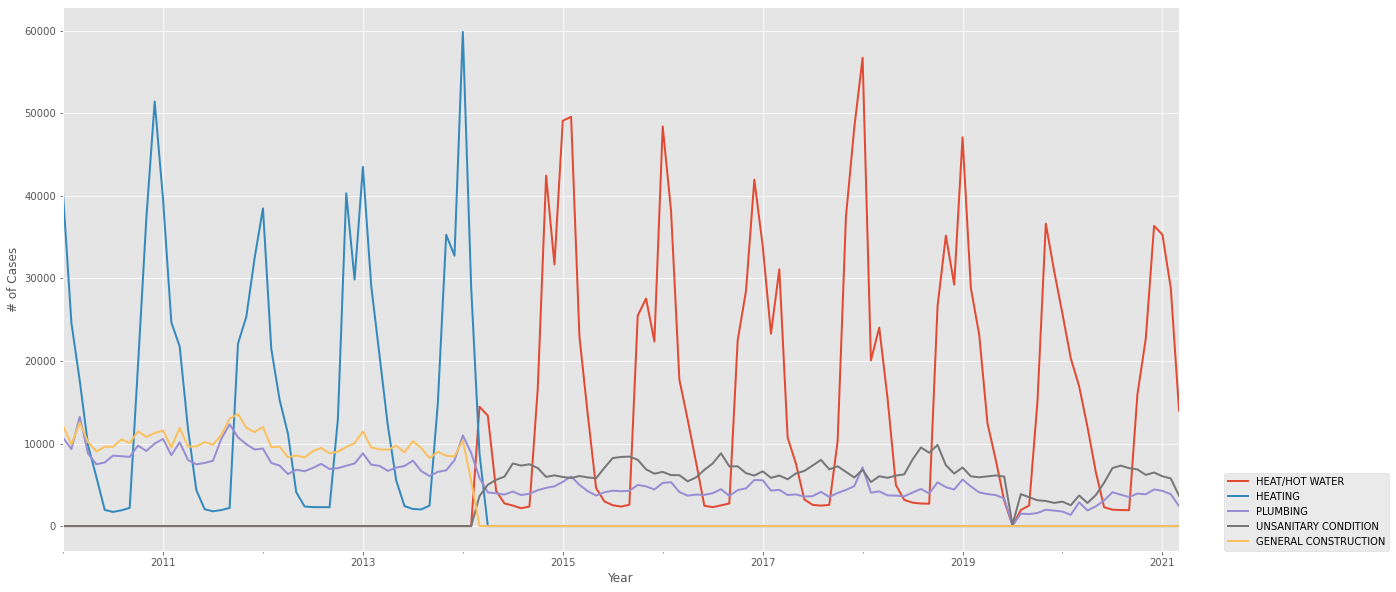

In [11]:
ts.plot(figsize=(20,10), linewidth=2)
plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
plt.xlabel('Year')
plt.ylabel('# of Cases')
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): 
<p style='font-family:Trebuchet MS; color:#FF4500'>HEAT/HOT WATER</p><p style='font-family:Trebuchet MS'>The Most Complaint Type since Year 2015. There are seasonality around the year. The # of cases spikes at the end of the years and continues to the beginning of the preceeding year and finally goes down in the middle of the year.
<p style='font-family:Trebuchet MS; color:#3498DB'>HEATING</p><p style='font-family:Trebuchet MS'>The previous most complaint type before HEAT/HOT WATER (from year 2010 to 2014). Having the similar pattern with HEAT/HOT WATER, it is probably replaced by HEAT/HOT WATER in the later years. 
<p style='font-family:Trebuchet MS; color:#8A2BE2'>PLUMBING</p><p style='font-family:Trebuchet MS'>Number of PLUMBING complaint cases remained constant in every month and eventually every year.
<p style='font-family:Trebuchet MS; color:#808080'>UNSANITARY CONDITION</p><p style='font-family:Trebuchet MS'>It first appeared in Year 2014. Since then, # of UNSANITARY CONDITION complaint cases remained constant monthly and annually.
<p style='font-family:Trebuchet MS; color:#FFD700'>GENERAL CONSTRUCTION</p><p style='font-family:Trebuchet MS'>The last record of complaint cases of GENERAL CONSTRUCTION stopped in the Year 2014. Before that, # of GENERAL CONSTRUCTION remained constant monthly and annually.

<p style='font-family:Trebuchet MS'>Since we have identified our main complaint_type, the data will be filtered by <code>complaint_type</code> == 'HEAT/HOT WATER' for further analysis and to make the data smaller.

In [12]:
df = df[df['complaint_type']=='HEAT/HOT WATER']

<h1 style='font-family: Trebuchet MS; color:#34459E'> Other Categorical Variables <a id='5'></a></h1>

In [13]:
categorical = df[['status', 'address_type', 'location_type']]

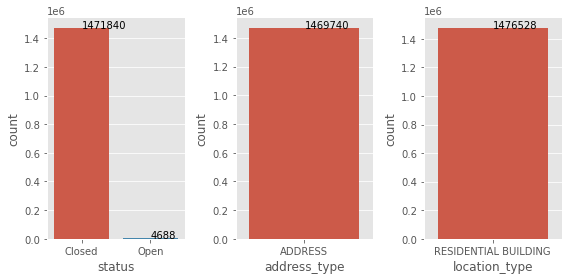

In [14]:
fig, ax = plt.subplots(round(len(categorical.columns)/3), 3, figsize=(8,4))

for i, ax in enumerate(fig.axes): 
    if i < len(categorical.columns):
        sns.countplot(x = categorical.columns[i], data=categorical, ax=ax)
        for rect in ax.patches:
            ax.text(rect.get_x()+rect.get_width()/2, rect.get_height()+1000, '%d'%rect.get_height())

plt.tight_layout()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <ol><p style='font-family:Trebuchet MS'>
    1. <code>status</code> is dominant by Closed. <br>
    2. <code>address_type</code> & <code>location_type</code> only have 1 category. 

<h1 style='font-family: Trebuchet MS; color:#34459E'> Time Series Analysis <a id='6'></a></h1>

In [15]:
ts_heat =pd.DataFrame( ts['HEAT/HOT WATER'].replace(0.0, np.nan).dropna())

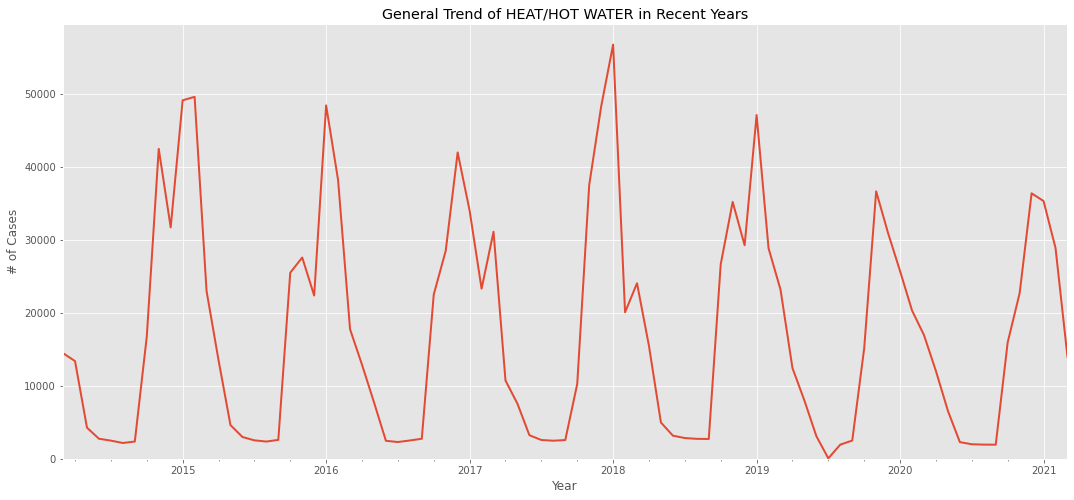

In [16]:
ts_heat['HEAT/HOT WATER'].plot(linewidth=2,
             label=None)
plt.xlabel('Year')
plt.ylabel('# of Cases')
plt.title('General Trend of HEAT/HOT WATER in Recent Years')
plt.ylim(0,)
plt.show()

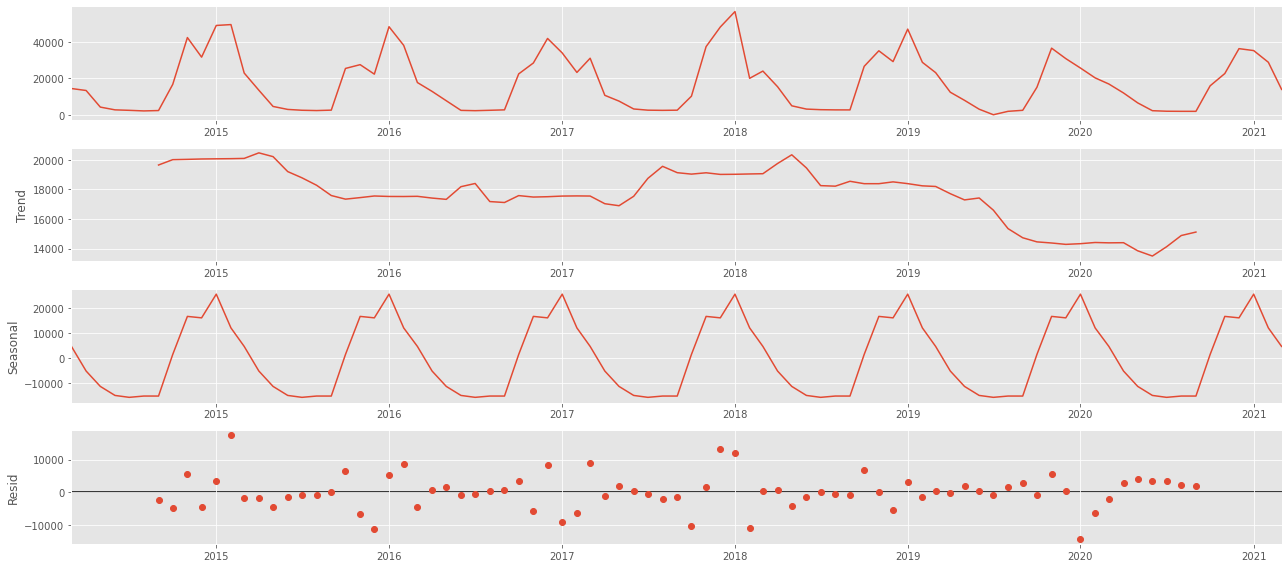

In [17]:
decomposition = sm.tsa.seasonal_decompose(ts_heat)
fig = decomposition.plot()
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <ol><p style='font-family:Trebuchet MS'>
    1. The general trend is in downtrend. <br>
    2. It has obvious seasonality.

In [18]:
ts_heat['year'] = [d.year for d in ts_heat.index]
ts_heat['month'] = [d.strftime('%b') for d in ts_heat.index]
years = ts_heat['year'].unique()

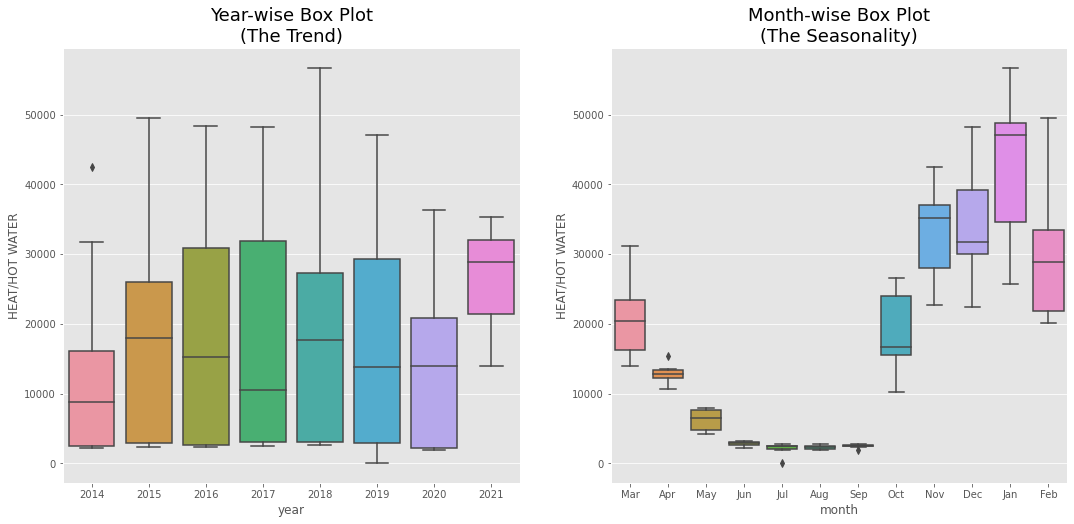

In [19]:
fig, axes = plt.subplots(1, 2)
sns.boxplot(x='year', y='HEAT/HOT WATER', data=ts_heat, ax=axes[0])
sns.boxplot(x='month', y='HEAT/HOT WATER', data=ts_heat)
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <ol><p style='font-family:Trebuchet MS'>
<p style='font-family:Trebuchet MS; color:black'>Year-wise(The Trend):</p><p style='font-family:Trebuchet MS'> The median seems to move within the range of 100000 and 200000 over the years. Over the previous 3 years (2018, 2019, 2020), the max of each years are descreasing. In the year 2021, IQR and mean reduced and increased significantly; this may be due to the Year 2021 has not ended yet, some of the complaints might be lodged in the future months. 
<p style='font-family:Trebuchet MS; color:black'>Month-wise(The Seasonality):</p><p style='font-family:Trebuchet MS'> Major complaints came from October to May, especially November, December, Januaary and February. Jun to September has insignificant amount of complaints. <br>Summing up, month-wise plot, it is not hard to relate the number of cases to weather, temperature. For examples, people started to complain about HEAT/HOT WATER in the winter, if it was absent when they needed it. Finding correlation value between the number of cases and temperature and plotting the them together can help to confirm this hypothesis.

<p style='font-family: Trebuchet MS; color:#34495E'> Import Temperature Data

In [20]:
temp = pd.read_csv('temperature.csv')

In [21]:
temp = temp[['myDt', 'AvgTemperature']]
temp.set_index('myDt', inplace=True)
temp.index = pd.to_datetime(temp.index)
temp = temp.resample('MS').mean()

In [22]:
ts_heat_temp = pd.concat([temp,ts_heat['HEAT/HOT WATER']], axis=1).dropna()

In [23]:
ts_heat_temp.corr()

,AvgTemperature,HEAT/HOT WATER
AvgTemperature,1.000000,-0.875507
HEAT/HOT WATER,-0.875507,1.000000


In [24]:
plt.style.use('bmh')

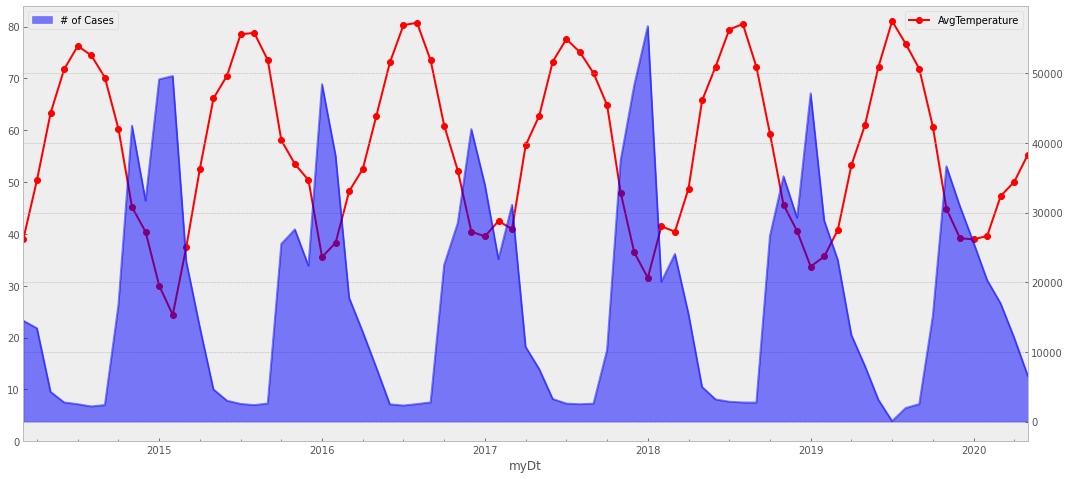

In [25]:
ts_heat_temp['AvgTemperature'].plot( marker='o', color='r', label='AvgTemperature')
plt.legend()
ts_heat_temp['HEAT/HOT WATER'].plot(secondary_y=True,kind='area', color='blue', alpha=0.5, label='# of Cases')
plt.legend(loc='upper left')
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <ol><p style='font-family:Trebuchet MS'>
<p style='font-family:Trebuchet MS; color:black'> Pearson Correlation Coefficient:</p><p style='font-family:Trebuchet MS'> From corr method, the pearson correlation coefficient between the variables (# of cases and AvgTemperature) has been determined. A -0.87 indicates a nearly perfectly negative linear correlation between two variables. (<a href='https://www.statology.org/how-to-read-a-correlation-matrix/'> referencing here </a>).
<p style='font-family:Trebuchet MS; color:black'> Temperature & # of Cases plot:</p><p style='font-family:Trebuchet MS'> During the time when the average temperature is at its lowest (in the beginning of the year), the # of complaint cases is at its highest; while the weather gets warmer in summer(mid of the year), the complaints decreases gradually.

<p style='font-family:Trebuchet MS; color:#34459E'>How long time does it takes to close a case?

In [26]:
df['time_taken'] = df['closed_date'] - df['created_date']
Q3 = df.describe()['time_taken'].loc['75%']
Q1 = df.describe()['time_taken'].loc['25%']
df['time_taken'].describe()

count                      1471840
mean     2 days 23:43:51.182015032
std      6 days 23:46:29.317923183
min                0 days 00:00:00
25%                1 days 09:05:36
50%                2 days 11:04:14
75%                4 days 00:00:00
max             1868 days 05:11:56
Name: time_taken, dtype: object

<p style='font-family:Trebuchet MS; color:#34459E'> Outliers </p>
<p style='font-family:Trebuchet MS'> Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<p style='font-family:Trebuchet MS'> 
-   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,<br>
-   smaller than Q1 by at least 1.5 times the IQR.

In [27]:
IQR = Q3 - Q1
outliers = Q3 + 1.5*IQR
df_outliers = df[df['time_taken'] > outliers]

In [28]:
df_outliers.shape[0]

40134

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p>
Most of the cases are closed within 4 days. There are 40134 outliers which takes more than 4 days to close. In fact, when the owner receives a violation, he/she has to correct the condition immediately and the complaint will only be closed when the person who complaints indicated that the condition was corrected. (<a href='https://www1.nyc.gov/site/hpd/services-and-information/report-a-maintenance-issue.page '> source </a>)

<p style='font-family:Trebuchet MS; color:#34459E'>When did this situation occurs?

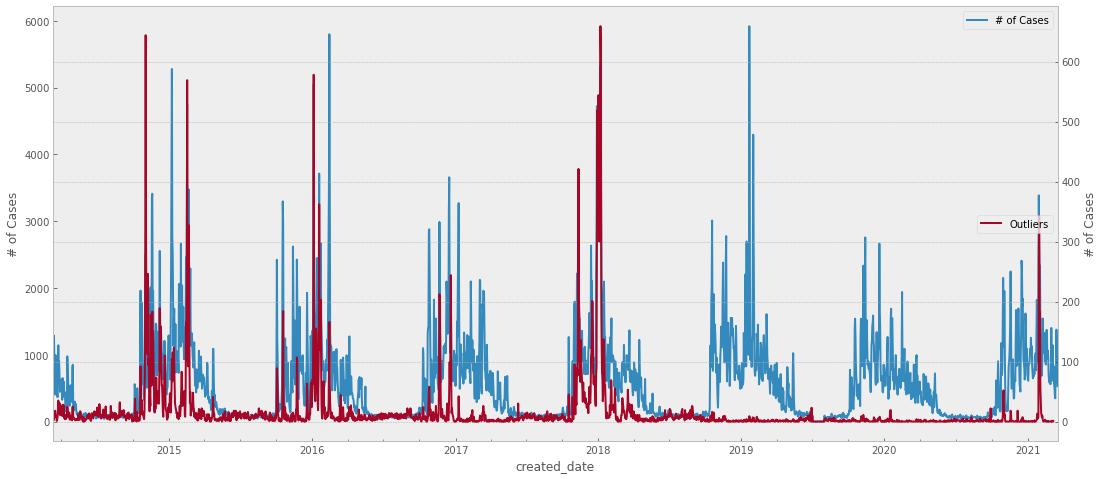

In [29]:
df.set_index(['created_date']).resample('D').count()['unique_key'].plot(label='# of Cases')
plt.legend()
plt.ylabel('# of Cases')
df_outliers.set_index(['created_date']).resample('D').count()['unique_key'].plot(secondary_y=True, label='Outliers')
plt.legend(loc='center right')
plt.ylabel('# of Cases')
plt.xlabel('Year')
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p><p style='font-family:Trebuchet MS'>
It can be seen that when there are a lot of complaints, the processing time will take longer. It is common as more manpower is required to solve more cases. By comparing the cases, it is sure that they are required to improve effeciency(there are approximately 10% of the tenants still suffering cold for more than 4 days after lodging complaints at peak complaint season). However, the condition has improved in the recent years (starting from 2019). Even though there are still 300 cases were left opened for more than 4 days in some day in 2021.

<h1 style='font-family: Trebuchet MS; color:#34459E'> Geospatial Data <a id='7'></a></h1>

In [30]:
geospatial = df[['incident_zip', 'incident_address', 'street_name', 'borough', 'latitude', 'longitude']]

In [31]:
geospatial.describe(include='object')

,incident_address,street_name,borough
count,1476528,1476528,1476528
unique,106128,5441,6
top,89-21 ELMHURST AVENUE,GRAND CONCOURSE,BRONX
freq,11931,26722,488445


<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p>
Unlike the other variables, there are only 6 category in <code>borough</code>. Pie chart would be suffice. 

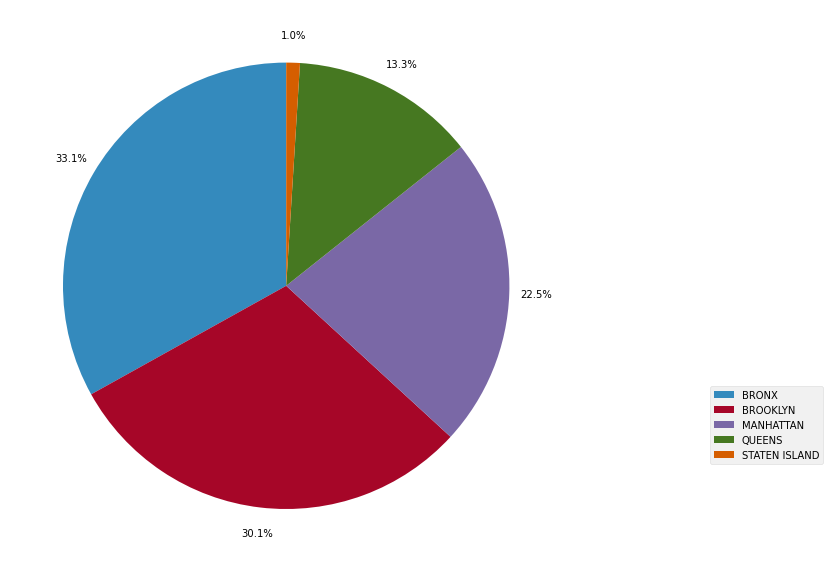

In [32]:
plt.figure(figsize=(10,12))
labels = df['borough'].value_counts().index[:5]
df['borough'].value_counts()[:5].plot(kind='pie',
                                  autopct='%1.1f%%',
                                  pctdistance = 1.12,
                                  labels= None,
                                  startangle=90)
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1.25,.25), ncol=1)
plt.ylabel('')
plt.show()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p>

<p style='font-family:Trebuchet MS'>The complaints are mostly come from BRONX(33.1%) and BROOKLYN(30.1%). It could be hard to choose among them on which to focus. However, if considering the populations of each borough as one of the criteria might give a better picture of the situation.  

<p style='font-family:Trebuchet MS'>Getting the information <a href='https://www.citypopulation.de/en/usa/newyorkcity/'> from U.S. Census Bureau </a>, as Estimate (2019-07-01), the populations of each borough are as follow:
<table style='font-family:Trebuchet MS'>
    <tr>
        <th>Borough</th>
        <th>Population</th>
    </tr>
    <tr>
        <td>Bronx</td>
        <td>1,418,207</td>   
    </tr>
    <tr>
        <td>Brooklyn</td>
        <td>2,559,903</td>   
    </tr>    
    <tr>
        <td>Manhattan</td>
        <td>1,628,706</td>   
    </tr>    
    <tr>
        <td>Queens</td>
        <td>2,253,858</td>   
    </tr>    
    <tr>
        <td>Staten Island</td>
        <td>476,143</td>   
    </tr>    

In [33]:
populations = pd.DataFrame({'Borough':['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], 'Population':[1418207, 2559903, 1628706, 2253858, 476143]})
complaints = pd.DataFrame(df['borough'].value_counts()[:5]).reset_index().rename(columns={'borough':'Complaints', 'index':'Borough'})
complaint_populations = pd.concat([populations, complaints['Complaints']], axis=1)
complaint_populations['%complaints'] = round(complaint_populations['Complaints']*100/complaint_populations['Population'], 2)
complaint_populations.sort_values(['%complaints'], ascending=False).style.background_gradient()

,Borough,Population,Complaints,%complaints
0,BRONX,1418207,488445,34.440000
2,MANHATTAN,1628706,332437,20.410000
1,BROOKLYN,2559903,444313,17.360000
3,QUEENS,2253858,196771,8.730000
4,STATEN ISLAND,476143,14561,3.060000


<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p>
1. <code>% of complaints</code> in BRONX is the highest, followed by MANHATTAN. <br>
2. BROOKLYN although has the second highest complaint cases lodged, but due to its larger populations, it has the third % of complaints.

<p style='font-family:Trebuchet MS'>Since we have identified our most affect <code>borough</code>, the dataset will be filtered by <code>borough</code> == 'BRONX' for further analysis and to make the data smaller.

In [34]:
df = df[df['borough']=='BRONX']

In [35]:
df = df.dropna(axis=0)

<p style='font-family:Trebuchet MS'>Noting dtype of <code>incident_zip</code> column is float64 (eg.10453.0) while dtype of zipcode in json file is integer-like str (eg. '10453'). Conversion is required.

In [36]:
df['incident_zip'] = df['incident_zip'].astype('int')
df['incident_zip'] = df['incident_zip'].astype('str')

In [37]:
df_zip = pd.DataFrame(df['incident_zip'].value_counts()).reset_index().rename(columns={'incident_zip': 'NumCases','index':'incident_zip'})

In [38]:
import folium

In [39]:
threshold_scale = np.linspace(df_zip['NumCases'].min(),
                              df_zip['NumCases'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 
fig = folium.Map(location=[40.8448, -73.8648], zoom_start=12)
fig.choropleth(geo_data = 'nyZips.geojson',
                data= df_zip,
                columns=['incident_zip','NumCases'],
                key_on = 'feature.properties.postalcode',
                fill_color = 'RdBu',
                threshold_scale = threshold_scale)
fig      

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): </p>
The complaints came from the west BRONX.

<p style='font-family:Trebuchet MS'> The brief exploratory data analysis have completed for this dataset. From <b>Problem Statement 3</b>, it informed that there is another additional dataset to complete this project. So, exploratory data analysis on the other dataset is required.

<h1 style='font-family:Trebuchet MS; color:#34495E'> About Dataset 2<a id='8'></a></h1><p style='font-family:Trebuchet MS'>
This PLUTO dataset will have the housing characteristic in BRONX. It can be downloaded from <a href = ' https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_18v1.zip'> here </a>.

<table style='font-family:Trebuchet MS'>
  <tr>
    <th>Field</th>
    <th>Description</th>
  </tr>
  <tr>
      <td><code>Address</code></td>
    <td>The building's address. </td>
  </tr>
  <tr>
    <td><code>BldgDepth</code></td>
    <td>The building’s depth, which is the effective perpendicular distance, measured in feet.</td>
  </tr>  
  <tr>
    <td><code>BuiltFAR</code></td>
    <td>The BUILT FLOOR AREA RATIO is the total building floor area divided by the area of the tax lot.</td>
  </tr>  
  <tr>
    <td><code>LotArea</code></td>
    <td>Total area of the tax lot, expressed in square feet rounded to the nearest integer.</td>
  </tr> 
    <tr>
    <td><code>LotDepth</code></td>
    <td>The tax lot's depth measured in feet.</td>
  </tr> 
    <tr>
    <td><code>NumFloors</code></td>
    <td>The number of full and partial stories starting from the ground floor, for the tallest building on the tax lot.</td>
  </tr>  
    <tr>
    <td><code>ResArea</code></td>
    <td>An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use. </td>
  </tr> 
    <tr>
    <td><code>YearBuilt</code></td>
    <td>The year construction of the building was completed. </td>
  </tr>
    <tr>
    <td><code>YearAlter1</code></td>
    <td>If a building has only been altered once, YEAR ALTERED 1 is the date that alteration began. </td>
  </tr>    
    <tr>
    <td><code>ZipCode</code></td>
    <td>The zip code that the tax lot is located in.Only one data source is used per tax lot.The zip code is obtained from the Department of City Planning Geosupport System. If the zip code is not available from Geosupport, the DOF-RPAD Master file is used. If a tax lot is split by a zip code boundary, only one zip code is retained..</td>
  </tr>    
    <tr>
    <td><code>YCoord</code></td>
    <td>The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system.</td>
  </tr>   
    <tr>
    <td><code>XCoord</code></td>
    <td>The X coordinate of the XY coordinate pair which depicts the approximate location of the lot. The XY coordinates are expressed in the New YorkLong Island State Plane coordinate system. </td>
  </tr>       
    
    
    
    
    
</table>

<p style='font-family:Trebuchet MS'> From Above Dataset 2 section, it is easy to see that the types of features can be categorised into: <ol><p style='font-family:Trebuchet MS'>
1. <code>BldgDepth, BuiltFAR, LotArea, LotDepth, ResArea</code>, <code>YearBuilt, YearAlter1, NumFloors</code> are numerical features.<br>
2. <code>ZipCode, YCoord, XCoord</code> are geospatial data.

<p style='font-family: Trebuchet MS; color:#34495E'> Import Dataset

In [40]:
df_bx = pd.read_csv('BX_18v1.csv')
df_bx = df_bx[['Address', 'BldgDepth', 'BuiltFAR','LotArea', 'LotDepth', 'NumFloors', 'ResArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h1 style='font-family: Trebuchet MS; color:#34459E'> Preliminary Analysis 2<a id='9'></a></h1>

In [41]:
df_bx.shape

(89854, 12)

<p style='font-family:Trebuchet MS; color:#34459E'> Exploring dtype & Null & Unique Value Distribution </p>

In [42]:
NullUnique(df_bx)

,Feature,UniqueValue,NullValue,%Null,Data Type
10,YCoord,33051,3259,3.630000,float64
11,XCoord,29661,3259,3.630000,float64
9,ZipCode,27,329,0.370000,float64
0,Address,87018,69,0.080000,object
1,BldgDepth,2176,0,0.000000,float64
2,BuiltFAR,780,0,0.000000,float64
3,LotArea,12063,0,0.000000,int64
4,LotDepth,7725,0,0.000000,float64
5,NumFloors,47,0,0.000000,float64
6,ResArea,8775,0,0.000000,int64


<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <br>

<p style='font-family:Trebuchet MS'>Unique Values: <br>
    1. Most of columns have a lot of unique values..<br>
    2.  There are 87018 unique values in <code>Address</code> might indicates that there are duplicate entry.<br><br>
Null Values:<br>
    1.<code>YCoord, XCoord</code> have the same amount of NullValues. Other than that, only <code>ZipCode</code> and <code>Address</code> have NullValues. Missing values are to be dropped in <code>Address</code> for further analysis because this dataset is to be merged with previous dataset on this column.<br>
    2. The columns with maximum Null Values is <code> closed_date</code>(2.2%), followed by <code> address_type</code>(1.3%), <code> incident_zip</code>(1.24%), <code> latitude</code>(1.24%) and <code> longitude</code>(1.24%), <code> city</code>(1.23%). <br>
3. <code> created_date</code>, <code> unique_key</code>, <code> complaint_type</code>, <code> borough</code>, <code> status</code> have no null value; which is good news because <code> complaint_type</code> would be the main concern in this analysis.<br><br>
Data Types:<br>    
1.<code>ZipCode</code> & <code>NumFloors</code> are in float64 but they are expected to be in int64. <code> YearBuilt, YearAlter1</code> also to changed to int64.

<p style='font-family:Trebuchet MS; color:#34459E'>Looking for duplicates <br>

In [43]:
df_bx.duplicated().value_counts()

False    89627
True       227
dtype: int64

<p style='font-family:Trebuchet MS'> Yes, there are 227 duplicate entries while the other 89627 entries might have the same address but different building characteristics. At this moment, the only action would be taken is to drop duplicates and null values in <code>Address</code> columns.

<p style='font-family:Trebuchet MS; color:#34459E'>Remove duplicates in Address Column<br>

In [44]:
df_bx = df_bx.drop_duplicates()

<p style='font-family:Trebuchet MS; color:#34459E'>Remove Missing Values in Address Column<br>

In [45]:
df_bx.dropna(subset=['Address'], axis=0, inplace=True)

In [46]:
df_bx.shape

(89622, 12)

<p style='font-family:Trebuchet MS; color:#34459E'>Correlation Heat Map<br>

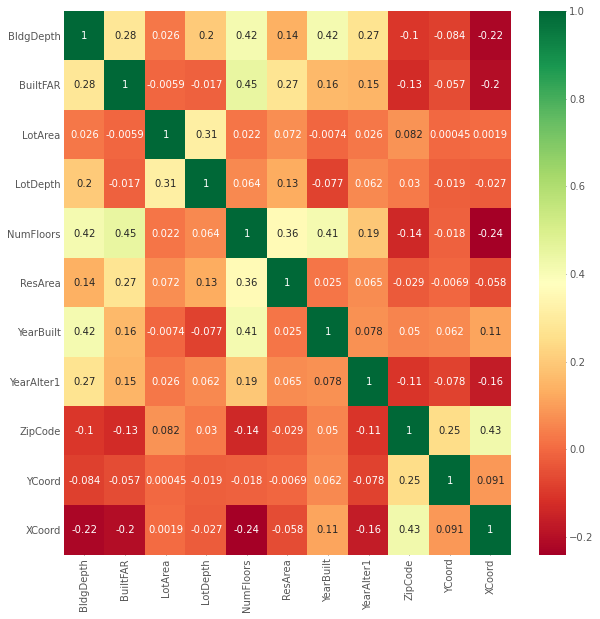

In [57]:
plt.figure(figsize=(10,10))
sns.heatmap(df_bx.corr(), annot=True, cmap='RdYlGn')
plt.show()

<p style='font-family:Trebuchet MS'> From the correlation heat map, the variables are not correlated to each others.

<p style='font-family:Trebuchet MS; color:#34459E'>Preparing & Merging Data Sets<br>

In [47]:
df_address = df[['created_date','incident_address']].sort_values('created_date')

In [48]:
df_address.shape

(485709, 2)

In [49]:
df_ = pd.merge(left=df_address,
               right = df_bx,
               left_on = 'incident_address',
               right_on = 'Address',
               how = 'left')
df_ = df_.dropna()
df_.shape

(364987, 14)

<p style='font-family:Trebuchet MS'> It can be seen that by merging the 2 data sets, some rows were removed because the <code>incident_address</code> does not matches <code>Address</code>. Further analysis will be conducted on the new merged data set.

<p style='font-family:Trebuchet MS'> As mentioned earlier, the data types of <code>ZipCode,NumFloors,YearBuilt,YearAlter1</code> are changed to int64.

In [50]:
df_[['ZipCode','NumFloors','YearBuilt','YearAlter1']] =df_[['ZipCode','NumFloors','YearBuilt','YearAlter1']].astype('int')

<p style='font-family:Trebuchet MS'> As mentioned earlier, most variables are numerical variables. However, for better visualisation, they are visualised with different kinds of plot due to their difference in unique values. Those with lesser unique values, including: <code>NumFloors,YearBuilt,YearAlter1</code>, thy are visualised with Bar Plot while others: <code>BldgDepth, BuiltFAR, LotArea, LotDepth, ResArea</code>, will be visualised with Regression Plot. 

<h1 style='font-family: Trebuchet MS; color:#34459E'> Visual with Bar Plot<a id='10'></a></h1>

In [51]:
categorical = df_[['YearBuilt', 'YearAlter1','NumFloors']]

<ipython-input-52-0360f44178ad>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
<ipython-input-52-0360f44178ad>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
<ipython-input-52-0360f44178ad>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)


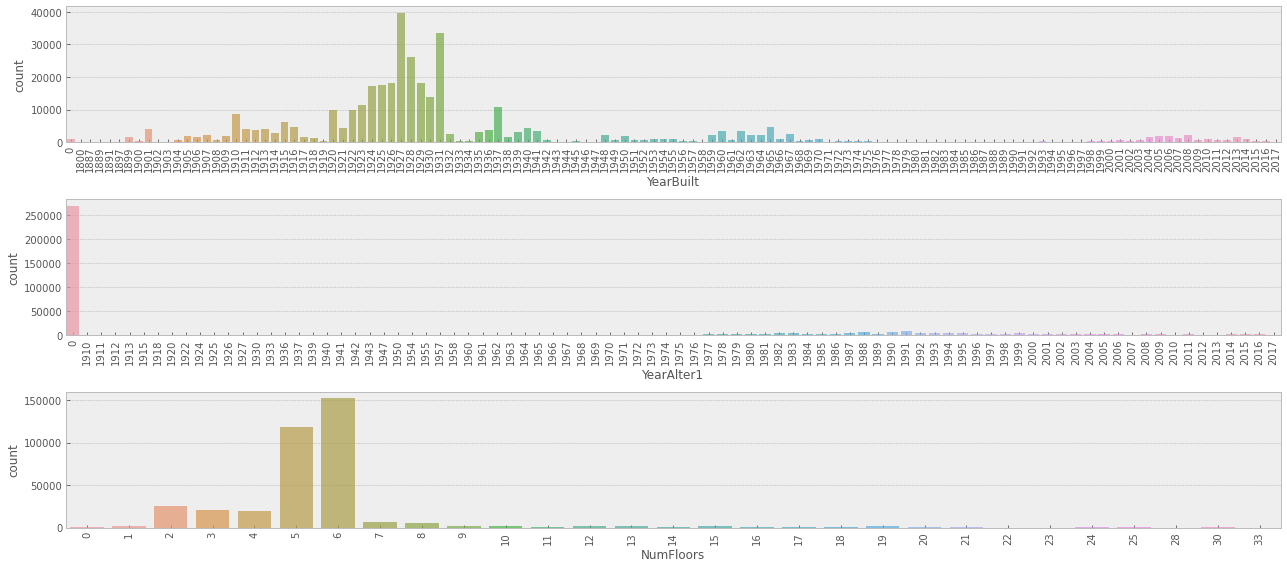

In [52]:
fig, axes = plt.subplots(round(len(categorical.columns) / 1), 1)

for i, ax in enumerate(fig.axes):
    if i < len(categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=categorical.columns[i], alpha=0.7, data=categorical, ax=ax)

fig.tight_layout()

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <br>

<p style='font-family:Trebuchet MS'><code>YearBuilt</code> <br>
Complaints from building with <code>YearBuilt</code> range within 1920 to 1931 is at maximum. <br><br>   
    <code>YearAlter1</code><br>
Complaints from building with <code>YearAlter1</code> == 0 is at maximum.It could probably indicates that the building without alteration complaints more much than those have altered.<br><br>
<code>NumFloors</code><br>    
Complaints from building with <code>NumFloors</code> == 5 or 6 is at maximum.

<h1 style='font-family: Trebuchet MS; color:#34459E'> Visualise with Regression Plot<a id='11'></a></h1>

In [53]:
numerical = df_[['BldgDepth', 'BuiltFAR', 'LotArea', 'LotDepth', 'ResArea']]

BldgDepth


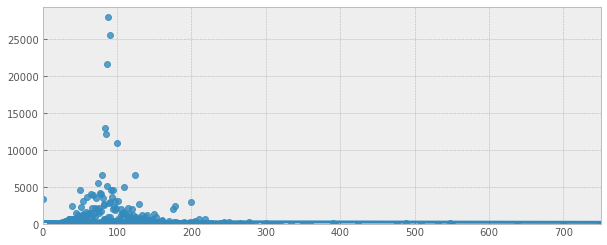

BuiltFAR


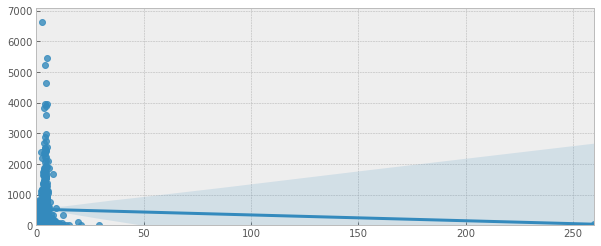

LotArea


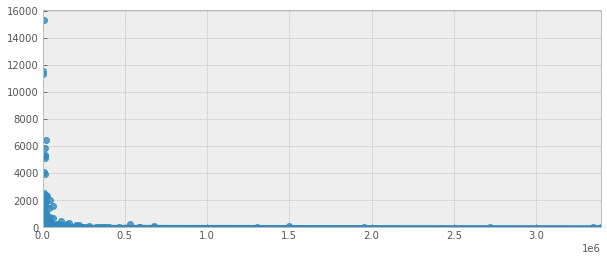

LotDepth


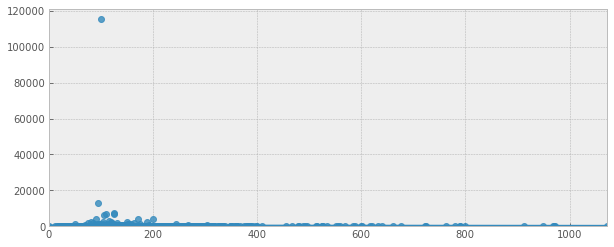

ResArea


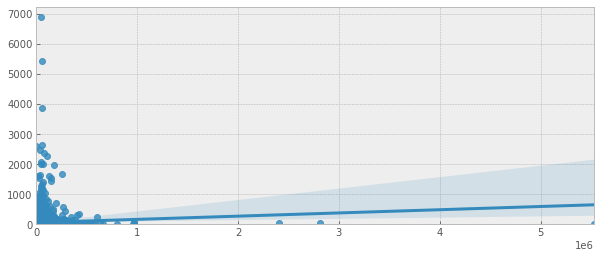

In [54]:
for i in numerical.columns:
    print(i)
    plt.figure(figsize=(10,4))
    sns.regplot(x = numerical[i].value_counts().index,
           y = numerical[i].value_counts().values)
    plt.ylim(0,)
    plt.show()

In [55]:
df_['LotDepth'].value_counts().head(1)

100.0    115299
Name: LotDepth, dtype: int64

<p style='font-family:Trebuchet MS; color:#34459E'>Observation(s): <br>

<p style='font-family:Trebuchet MS'><code>BldgDepth</code> <br>
Most of the data points (around <code>BldgDepth</code> == 100) have higher counts, indicating more complaints came from here.<br><br>   
    <code>BuiltFAR</code><br>
Most data points saturated around x = 0. Indicating the complaints came from those building with lower floor area ratio, where the total building floor area is very small. <br><br>
<code>LotArea</code><br>    
Shows similar pattern with <code>BuiltFAR</code>. <br><br>
    <code>LotDepth</code><br>    
Most data points are evenly distributed along y = ~0 (lower y value), indicating there are not much difference in complaint counts in building with different <code>LotDepth</code>. There is one outlier with counts= ~120,000 at <code>LotDepth</code> = 100. <br><br>
    <code>ResArea</code><br>    
Shows similar pattern with <code>BuiltFAR</code>. <br><br>